<a href="https://colab.research.google.com/github/Faysal1765/Bresenham_line_drwaing_algorithm/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
dataset_1 = pd.read_csv('/content/drive/MyDrive/titanic/train.csv')
dataset_2 = pd.read_csv('/content/drive/MyDrive/titanic/test.csv')


In [ ]:
dataset_1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
dataset_1.shape

(891, 12)

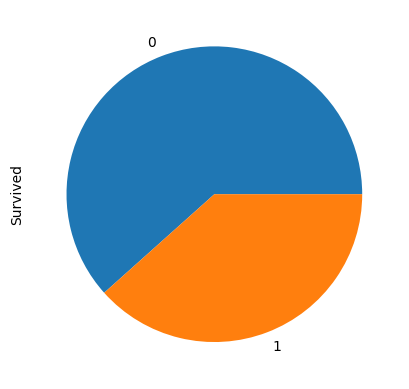

In [ ]:
dataset_1.Survived.value_counts()[0:30].plot(kind='pie')
plt.show()

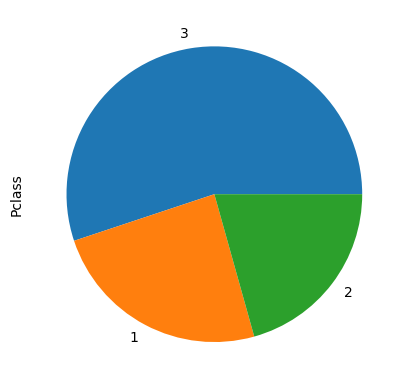

In [ ]:
dataset_1.Pclass.value_counts()[0:20].plot(kind='pie')
plt.show()

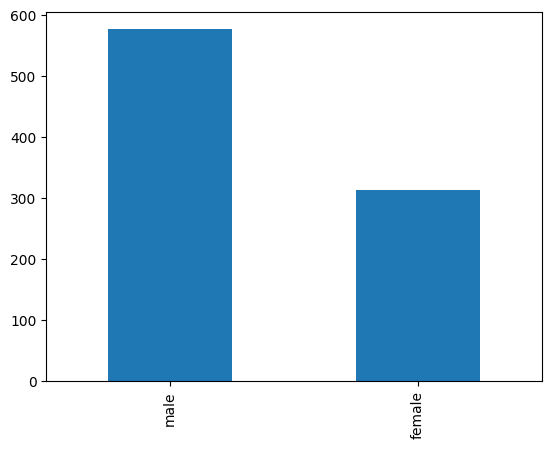

In [ ]:
dataset_1.Sex.value_counts()[0:30].plot(kind='bar')
plt.show()

In [ ]:
dataset_1=dataset_1.drop(columns=['SibSp','Parch', 'Ticket', 'Fare', 'Name', 'Cabin', 'Embarked'], axis=1)
dataset_1.head()

,PassengerId,Survived,Pclass,Sex,Age
0,1,0,3,male,22.0
1,2,1,1,female,38.0
2,3,1,3,female,26.0
3,4,1,1,female,35.0
4,5,0,3,male,35.0


In [ ]:
dataset_1.shape

(891, 5)

In [ ]:
dataset_1 = dataset_1.dropna()
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Sex          714 non-null    object 
 4   Age          714 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 33.5+ KB


In [ ]:
X = dataset_1.iloc[:, [0, 2, 4]].values
y = dataset_1.iloc[:, 1].values


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,0] = le.fit_transform(X[:,0])
X

array([[  0.,   3.,  22.],
       [  1.,   1.,  38.],
       [  2.,   3.,  26.],
       ...,
       [711.,   1.,  19.],
       [712.,   1.,  26.],
       [713.,   3.,  32.]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X = sc.fit_transform(X)
X

array([[0.        , 1.        , 0.27117366],
       [0.00140252, 0.        , 0.4722292 ],
       [0.00280505, 1.        , 0.32143755],
       ...,
       [0.99719495, 0.        , 0.23347575],
       [0.99859748, 0.        , 0.32143755],
       [1.        , 1.        , 0.39683338]])

In [ ]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
y = lb.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=7)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# define the keras model
model = Sequential()
model.add(Dense(10, input_dim=3, activation='relu'))
model.add(Dense(8, activation='relu'))

model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                40        
                                                                 
 dense_4 (Dense)             (None, 8)                 88        
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 137
Trainable params: 137
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train ,epochs=100, batch_size=100)

Epoch 1/100
5/5 [==============================] - 1s 3ms/step - loss: 0.6857 - accuracy: 0.6192
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 0.6825 - accuracy: 0.6132
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 0.6796 - accuracy: 0.6132
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 0.6765 - accuracy: 0.6052
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 0.6739 - accuracy: 0.6112
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 0.6712 - accuracy: 0.6232
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 0.6691 - accuracy: 0.6132
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 0.6664 - accuracy: 0.6152
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 0.6640 - accuracy: 0.6172
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 0.6616 - accuracy: 0.6253
Epoch 11/100
5/5 [===========

In [ ]:
acc = history.history['accuracy']
loss = history.history['loss']

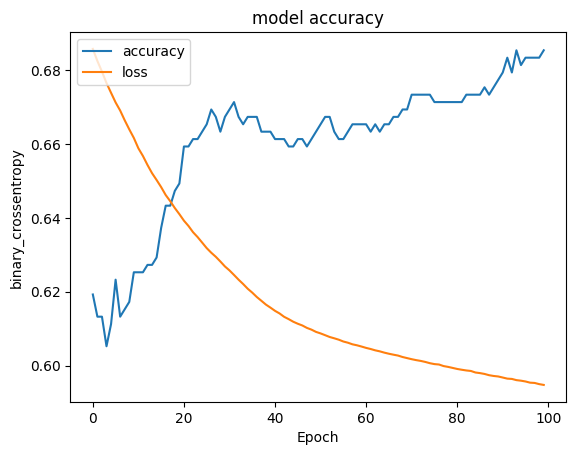

<Figure size 640x480 with 0 Axes>

In [ ]:
from matplotlib import pyplot as plt
#plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('binary_crossentropy')
plt.xlabel('Epoch')
plt.legend(['accuracy', 'loss'], loc='upper left')
# plt.legend(['loss'], loc='upper left')
plt.show()
plt.savefig('accuracy_curve.png')

In [ ]:
history_test = model.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.5869 - accuracy: 0.7163
